In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import imageio

# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from keras import Sequential, Model
from keras.models import load_model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from keras.metrics import AUC, Precision, Recall

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [3]:
# resizing images
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 50

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Set path for training testing and validation
# Data Generator for training, validation, and testing

folder = '/content/drive/MyDrive/Datasets/Omdena Myanmar/tuberculosis-detection-model/datasets/augmented'

# assigning paths
src_path_train = os.path.join(folder, 'train/')
src_path_val = os.path.join(folder, "val/")
src_path_test = os.path.join(folder,  'test/')
target_size = (256, 256)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        src_path_train,
        target_size = (256, 256),
        batch_size = 16,
        class_mode = 'binary',
        seed = 42)
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        src_path_val,
        target_size = (256, 256),
        batch_size = 16,
        class_mode = 'binary',
        seed = 42)
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        src_path_test,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 9822 images belonging to 2 classes.
Found 2455 images belonging to 2 classes.
Found 3302 images belonging to 1 classes.


In [6]:
# create model
def create_model(input_shape):
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=64, activation='relu'),
        Dense(units=2, activation='softmax')
        ])

model = create_model((256, 256, 3))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
# compile model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer = 'adam',
              metrics = ['accuracy', AUC(), AUC(curve='PR'), Precision(), Recall()])

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_ds)

Epoch 1/50
210/210 [==============================] - 328s 2s/step - loss: 0.3751 - accuracy: 0.8690 - val_loss: 0.3198 - val_accuracy: 0.8966
Epoch 2/50
210/210 [==============================] - 332s 2s/step - loss: 0.2754 - accuracy: 0.9164 - val_loss: 0.3086 - val_accuracy: 0.8918
Epoch 3/50
210/210 [==============================] - 313s 1s/step - loss: 0.4184 - accuracy: 0.8432 - val_loss: 0.4291 - val_accuracy: 0.8173
Epoch 4/50
210/210 [==============================] - 298s 1s/step - loss: 0.3737 - accuracy: 0.8985 - val_loss: 0.4350 - val_accuracy: 0.8173
Epoch 5/50
210/210 [==============================] - 287s 1s/step - loss: 0.3796 - accuracy: 0.8491 - val_loss: 0.3768 - val_accuracy: 0.8582
Epoch 6/50
210/210 [==============================] - 290s 1s/step - loss: 0.3333 - accuracy: 0.8574 - val_loss: 0.3462 - val_accuracy: 0.8486
Epoch 7/50
210/210 [==============================] - 328s 2s/step - loss: 0.3216 - accuracy: 0.8628 - val_loss: 0.3308 - val_accuracy: 0.8558

# Performance mtric for the model.

In [ ]:
# evaluating the mode
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

27/27 [==============================] - 27s 942ms/step - loss: 0.1446 - accuracy: 0.9505
Test Loss: 0.1446
Test Accuracy: 0.9505


In [ ]:
scores

[0.14462995529174805, 0.9504716992378235]

In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

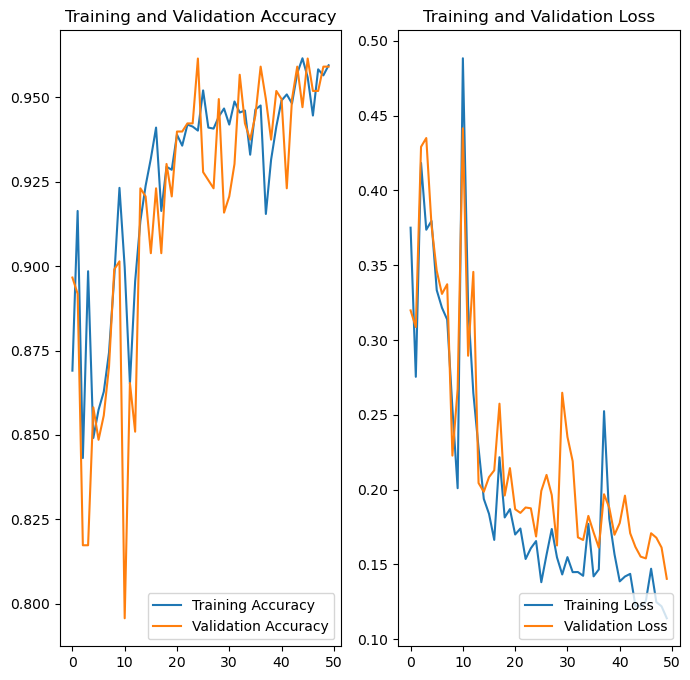

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

# Testing the model

first image to predict
actual label:  Normal
1/1 [==============================] - 18s 18s/step
predicted label: Normal


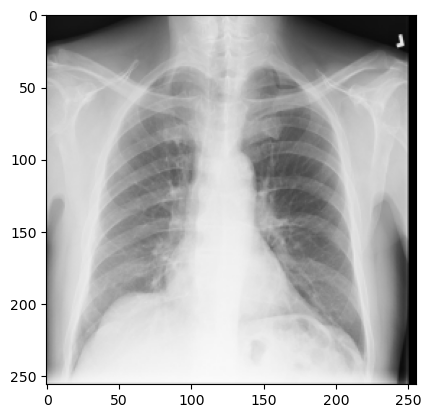

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label: ',class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label:',class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)

    return predicted_class,confidence


1/1 [==============================] - 1s 585ms/step


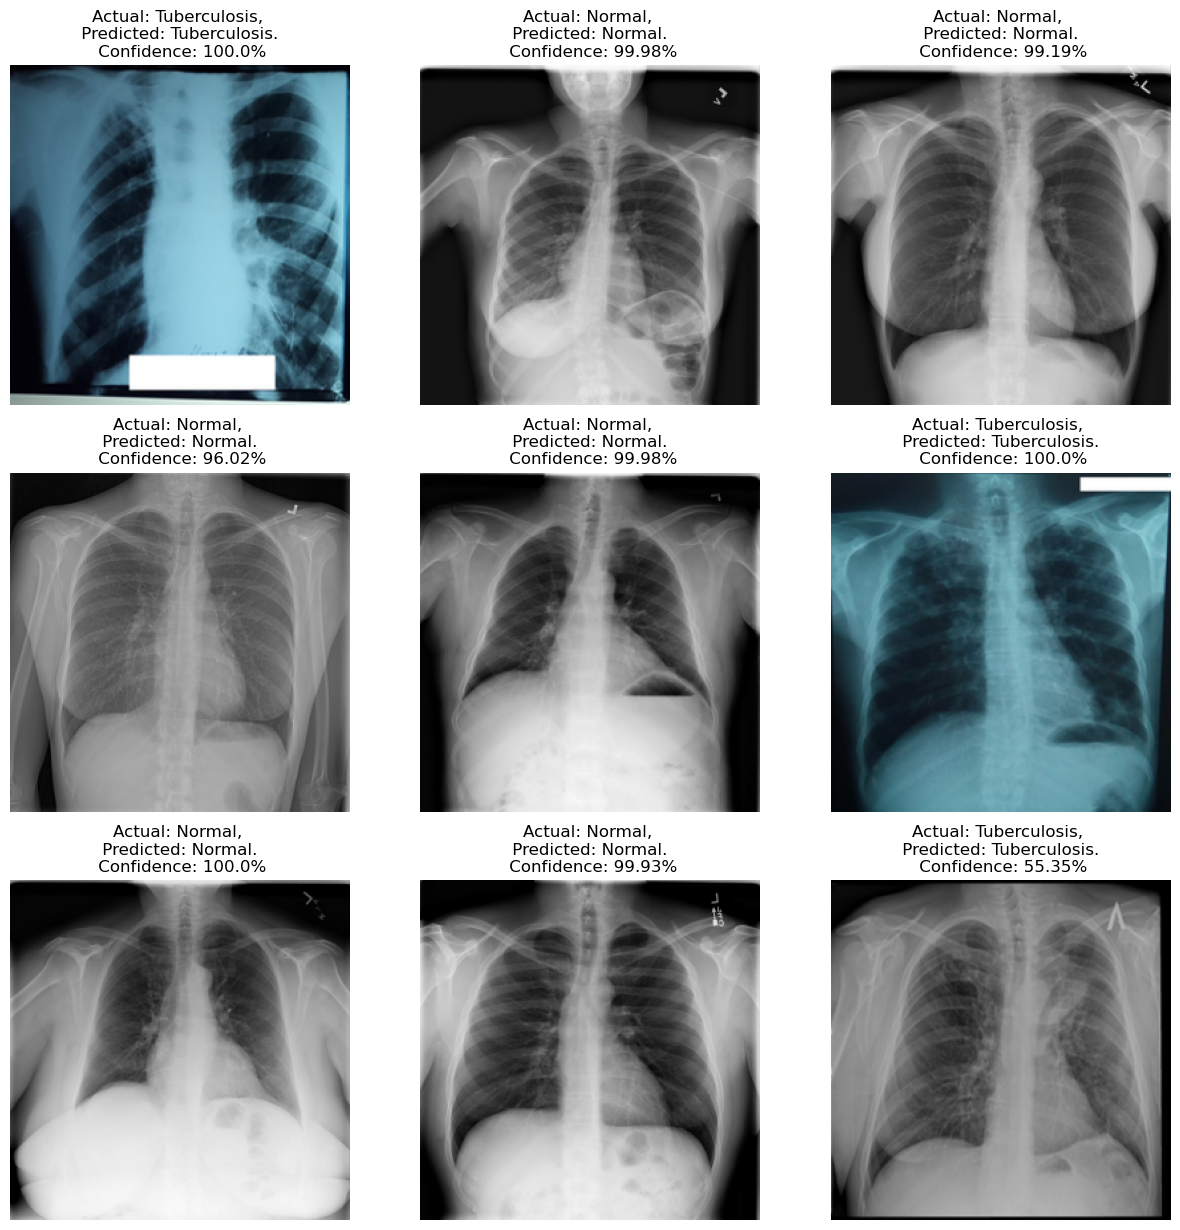

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model,images[i].numpy())
        #print(confidence)
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis('off')


In [ ]:
model_version = 5
model.save(f"saved_models/{model_version}")

INFO:tensorflow:Assets written to: saved_models/5\assets


INFO:tensorflow:Assets written to: saved_models/5\assets
